# Simple J profiling

In [29]:
import numpy as np
from scipy.special import gamma
import matplotlib as mpl
import matplotlib.pyplot as plt
import LL_inten_to_xsec as Litx
from tqdm import *
import pandas as pd

%matplotlib inline

## Super simple

To start with let's assume we have 2 energy bins, one with 50 counts, one with 100. Assume perfect background.

Can check with a lower nmc don't always get good data Asimov agreement, with higher do.

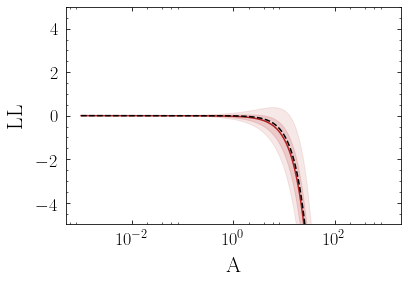

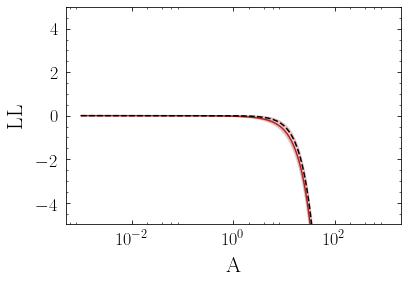

In [4]:
# Test with small number of MC

nmc = 5
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-3,3,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
    bin1_arr[imc] -= bin1_arr[imc][0]
    bin2_arr[imc] -= bin2_arr[imc][0]

# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))

bin1_Asimov -= bin1_Asimov[0]
bin2_Asimov -= bin2_Asimov[0]
    
# Plot arrays
plt.fill_between(A_ary,np.percentile(bin1_arr,2.5,axis=0),np.percentile(bin1_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin1_arr,16,axis=0),np.percentile(bin1_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin1_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin1_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

plt.fill_between(A_ary,np.percentile(bin2_arr,2.5,axis=0),np.percentile(bin2_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin2_arr,16,axis=0),np.percentile(bin2_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin2_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin2_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

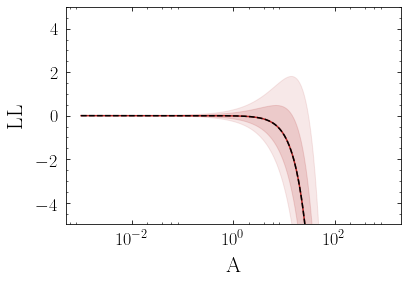

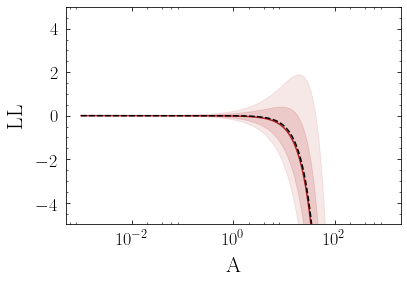

In [5]:
# With more MC get good agreement

nmc = 1000
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-3,3,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
    bin1_arr[imc] -= bin1_arr[imc][0]
    bin2_arr[imc] -= bin2_arr[imc][0]

# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))

bin1_Asimov -= bin1_Asimov[0]
bin2_Asimov -= bin2_Asimov[0]
    
# Plot arrays
plt.fill_between(A_ary,np.percentile(bin1_arr,2.5,axis=0),np.percentile(bin1_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin1_arr,16,axis=0),np.percentile(bin1_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin1_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin1_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

plt.fill_between(A_ary,np.percentile(bin2_arr,2.5,axis=0),np.percentile(bin2_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin2_arr,16,axis=0),np.percentile(bin2_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin2_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin2_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

Now combine using `LL_inten_to_xsec.pyx`. Let's pretend we have 3 halos with J-factors between 1 and 100 in counts and say it splits evenly between the bins.

## Manual intensity LLs and J-factor profiling

In [ ]:
nobj=2
log10Jvals = np.linspace(0,1,nobj)
Log10Jerrs = 0.1
PPnoxsec = np.array([0.5,0.5])

nmc = 5
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-6,6,200)

LL_ebin_arr = np.zeros((2,nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        LL_ebin_arr[0,imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        LL_ebin_arr[1,imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
# Calculate the Asimov
LL_ebin_Asimov = np.zeros((2,len(A_ary)))

for iA in range(len(A_ary)):
    LL_ebin_Asimov[0,iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    LL_ebin_Asimov[1,iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))
    
# Now profile over J

LL2 = np.zeros((nobj,nmc,len(A_ary)))
LL2_Asimov = np.zeros((nobj,len(A_ary)))

for iobj in range(nobj):
    J_proflike = np.linspace(log10Jvals[iobj]-3*Log10Jerrs,log10Jvals[iobj]+3*Log10Jerrs,700)
    
    for iA in range(len(A_ary)):
        LL_proflike = np.zeros(len(J_proflike))
        for Ji in range(len(J_proflike)):
            # Loop over J-factors
            for ei in range(2):
                # Loop over energy bins
                min_int = A_ary[0]
                max_int = A_ary[-1]
                intval = PPnoxsec[ei]*A_ary[iA]*pow(10.,J_proflike[Ji])
        
                if intval <= min_int:
                    # Add minimum value
                    LL_proflike[Ji] += LL_ebin_Asimov[ei,0]
                elif intval >= max_int:
                    # Add maximum value
                    LL_proflike[Ji] += LL_ebin_Asimov[ei,-1]
                else:
                    # Determine the value from interpolation
                    LL_proflike[Ji] += np.interp(intval,A_ary, LL_ebin_Asimov[ei])

            # Add the J-factor weighting term as a log normal
            LL_proflike[Ji] += -pow(J_proflike[Ji]-log10Jvals[iobj],2.)/(2*pow(Log10Jerrs,2.)) \
                            - np.log( np.sqrt(2*np.pi)*Log10Jerrs*pow(10.,J_proflike[Ji])*np.log(10) )

        # Now find the maximum LL from this list, as that's the profile likelihood method
        LL2_Asimov[iobj,iA] = 2*np.max(LL_proflike) # 2x because for TS
    
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]

for imc in range(nmc):
    for iobj in range(nobj):
        J_proflike = np.linspace(log10Jvals[iobj]-3*Log10Jerrs,log10Jvals[iobj]+3*Log10Jerrs,700)

        for iA in range(len(A_ary)):
            LL_proflike = np.zeros(len(J_proflike))
            for Ji in range(len(J_proflike)):
                # Loop over J-factors
                for ei in range(2):
                    # Loop over energy bins
                    min_int = A_ary[0]
                    max_int = A_ary[-1]
                    intval = PPnoxsec[ei]*A_ary[iA]*pow(10.,J_proflike[Ji])

                    if intval <= min_int:
                        # Add minimum value
                        LL_proflike[Ji] += LL_ebin_arr[ei,imc,0]
                    elif intval >= max_int:
                        # Add maximum value
                        LL_proflike[Ji] += LL_ebin_arr[ei,imc,-1]
                    else:
                        # Determine the value from interpolation
                        LL_proflike[Ji] += np.interp(intval,A_ary, LL_ebin_arr[ei,imc])

                # Add the J-factor weighting term as a log normal
                LL_proflike[Ji] += -pow(J_proflike[Ji]-log10Jvals[iobj],2.)/(2*pow(Log10Jerrs,2.)) \
                                - np.log( np.sqrt(2*np.pi)*Log10Jerrs*pow(10.,J_proflike[Ji])*np.log(10) )

            # Now find the maximum LL from this list, as that's the profile likelihood method
            LL2[iobj,imc,iA] = 2*np.max(LL_proflike) # 2x because for TS
    
        LL2[iobj,imc] -= LL2[iobj,imc,0]

for iobj in range(nobj):
    plt.fill_between(A_ary,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
    plt.fill_between(A_ary,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
    plt.plot(A_ary,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
    plt.plot(A_ary,LL2_Asimov[iobj],color='black',linestyle='--')
    plt.ylabel("TS")
    plt.xlabel("A")
    plt.xscale("log")
    plt.ylim(-5,5)
    plt.show()

## Manual intensity LLs, passed through J-factor profiling

In [ ]:
nobj=5
log10Jvals = np.linspace(0,1,nobj)
Log10Jerrs = 0.4
PPnoxsec = np.array([0.5,0.5])

nmc = 200
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-6,6,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))
    
# Now profile over J

LL2 = np.zeros((nobj,nmc,len(A_ary)))
LL2_Asimov = np.zeros((nobj,len(A_ary)))

for iobj in tqdm(range(nobj)):
    LL2_Asimov[iobj] = Litx.construct_xsec_LL(A_ary,np.array([0.0,1.0]),PPnoxsec,np.array([bin1_Asimov,bin2_Asimov]),np.array([A_ary,A_ary]),log10Jvals[iobj],Log10Jerrs)
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]
    for imc in range(nmc):
        LL2[iobj,imc] = Litx.construct_xsec_LL(A_ary,np.array([0.0,1.0]),PPnoxsec,np.array([bin1_arr[imc],bin2_arr[imc]]),np.array([A_ary,A_ary]),log10Jvals[iobj],Log10Jerrs)
        LL2[iobj,imc] -= LL2[iobj,imc,0]

for iobj in range(nobj):
    plt.fill_between(A_ary,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
    plt.fill_between(A_ary,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
    plt.plot(A_ary,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
    plt.plot(A_ary,LL2_Asimov[iobj],color='black',linestyle='--')
    plt.ylabel("LL")
    plt.xlabel("A")
    plt.xscale("log")
    plt.ylim(-5,5)
    plt.show()

## Intensity LLs

In [6]:
catalog_file = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/data/Catalogs/DarkSky_ALL_200,200,200_v3.csv'
catalog = pd.read_csv(catalog_file)

16it [03:28, 13.20s/it]


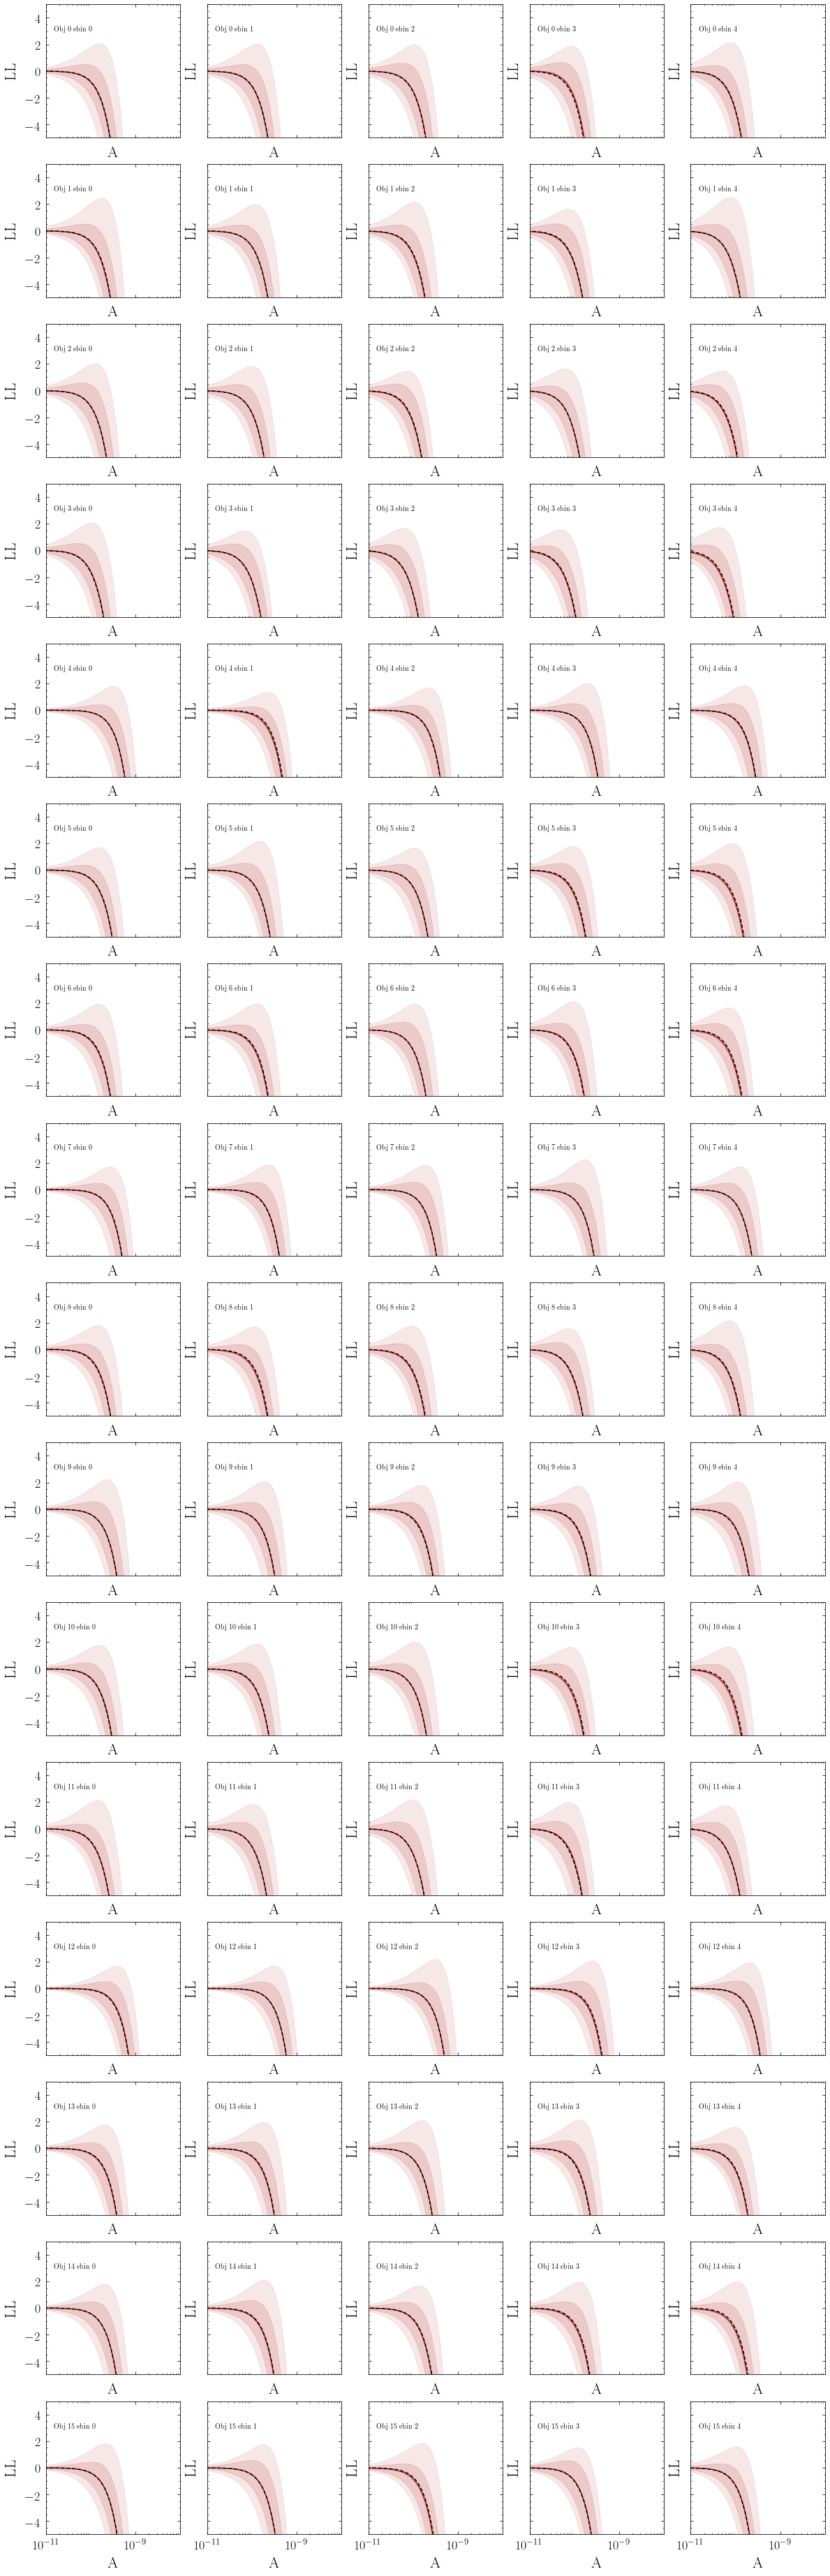

In [59]:
ncols=5
nrows=16
nmc = 500

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,100/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i
        iebin = j
        LL2 = np.zeros((nmc, 200))
        for imc in range(nmc):
            LL2[imc] = np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
        LL2_Asimov = np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][iebin]
        LL2_Asimov -= LL2_Asimov[0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
        cell.plot(inten,LL2_Asimov,color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-11,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)



## Pipe intensity LLs through J-factor profiling

100%|██████████| 16/16 [32:33<00:00, 126.95s/it]
4it [00:00, 14.34it/s]


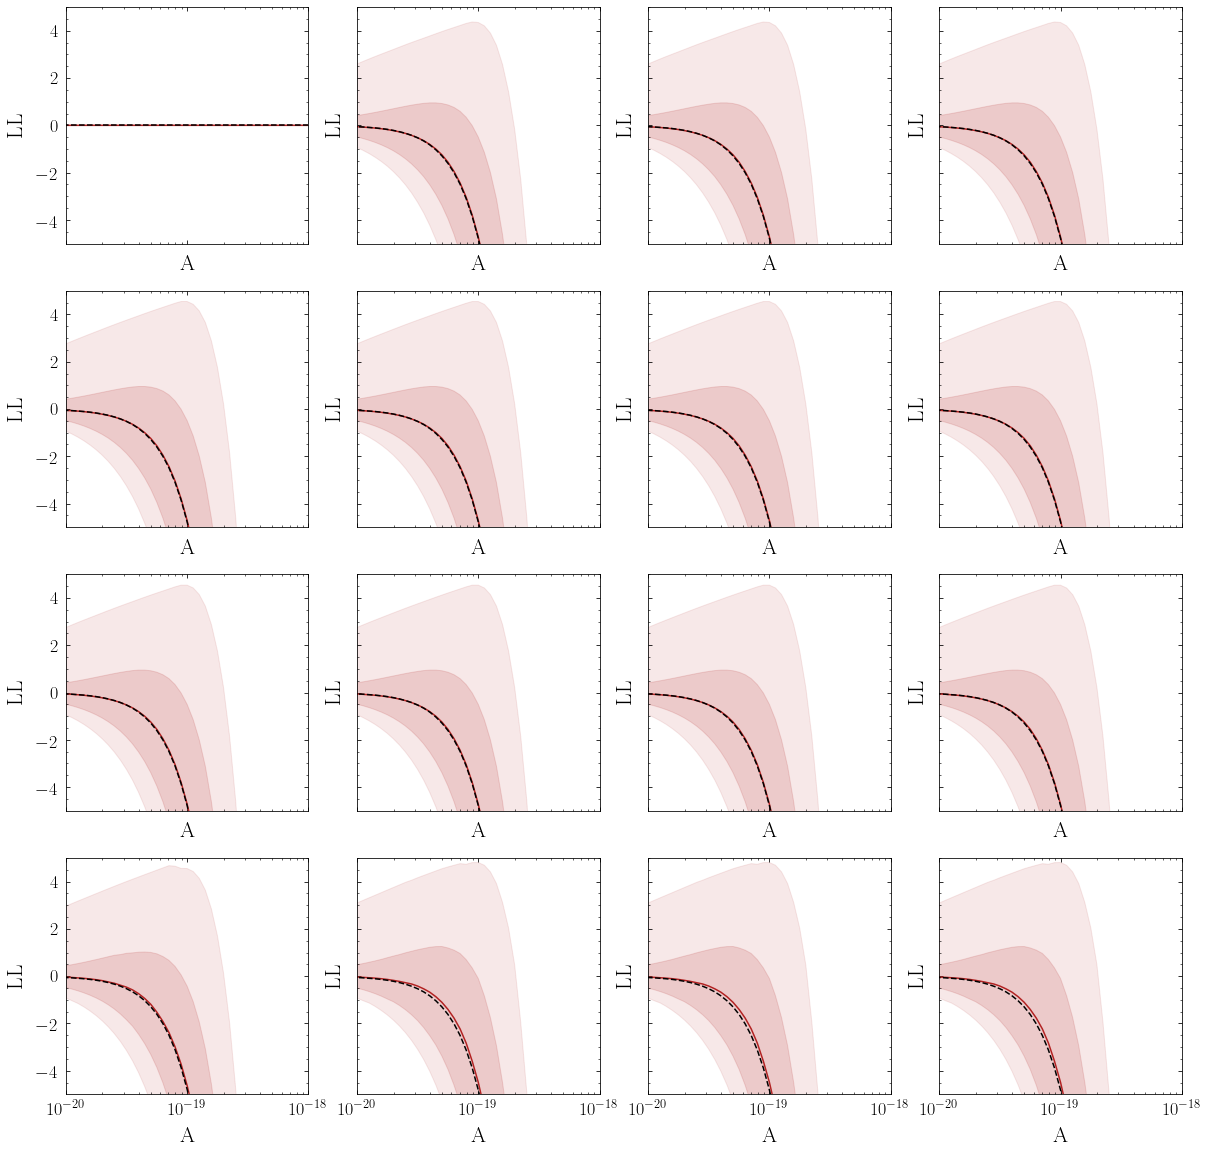

In [71]:
nobj=16
nebins = 5
log10Jvals = catalog.mulog10J_inf.values[:nobj]
Log10Jerrs = catalog.siglog10J_inf.values[:nobj]
PPnoxsec = np.load("../AdditionalData/PPnoxsec_b_ary.npy")[0,:nebins]

nmc = 500
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_Asimov = np.zeros((nobj,len(xsecs)))

for iobj in tqdm(range(nobj)):
    # Cumulative 
    # J-factor errors time ten!
    LL2_Asimov[iobj] = LL2_Asimov[iobj-1] + Litx.construct_xsec_LL(xsecs,np.arange(nebins, dtype=np.float64),PPnoxsec,np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][:nebins],np.load("data/AsimovProf1overJ//LL_inten_o"+str(iobj)+"_Asimov.npz")['intens'][:nebins],log10Jvals[iobj],Log10Jerrs[iobj]*10)
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]
    for imc in (range(nmc)):
        LL2[iobj,imc] = LL2[iobj-1,imc]  + Litx.construct_xsec_LL(xsecs,np.arange(nebins, dtype=np.float64),PPnoxsec,np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][:nebins],np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][:nebins],log10Jvals[iobj],Log10Jerrs[iobj]*10)
        LL2[iobj,imc] -= LL2[iobj,imc,0]
        
ncols=4
nrows=4

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
        cell.plot(xsecs,LL2_Asimov[iobj],color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-20,1e-18)
        cell.set_ylim(-5,5)

10it [00:08,  1.21it/s]


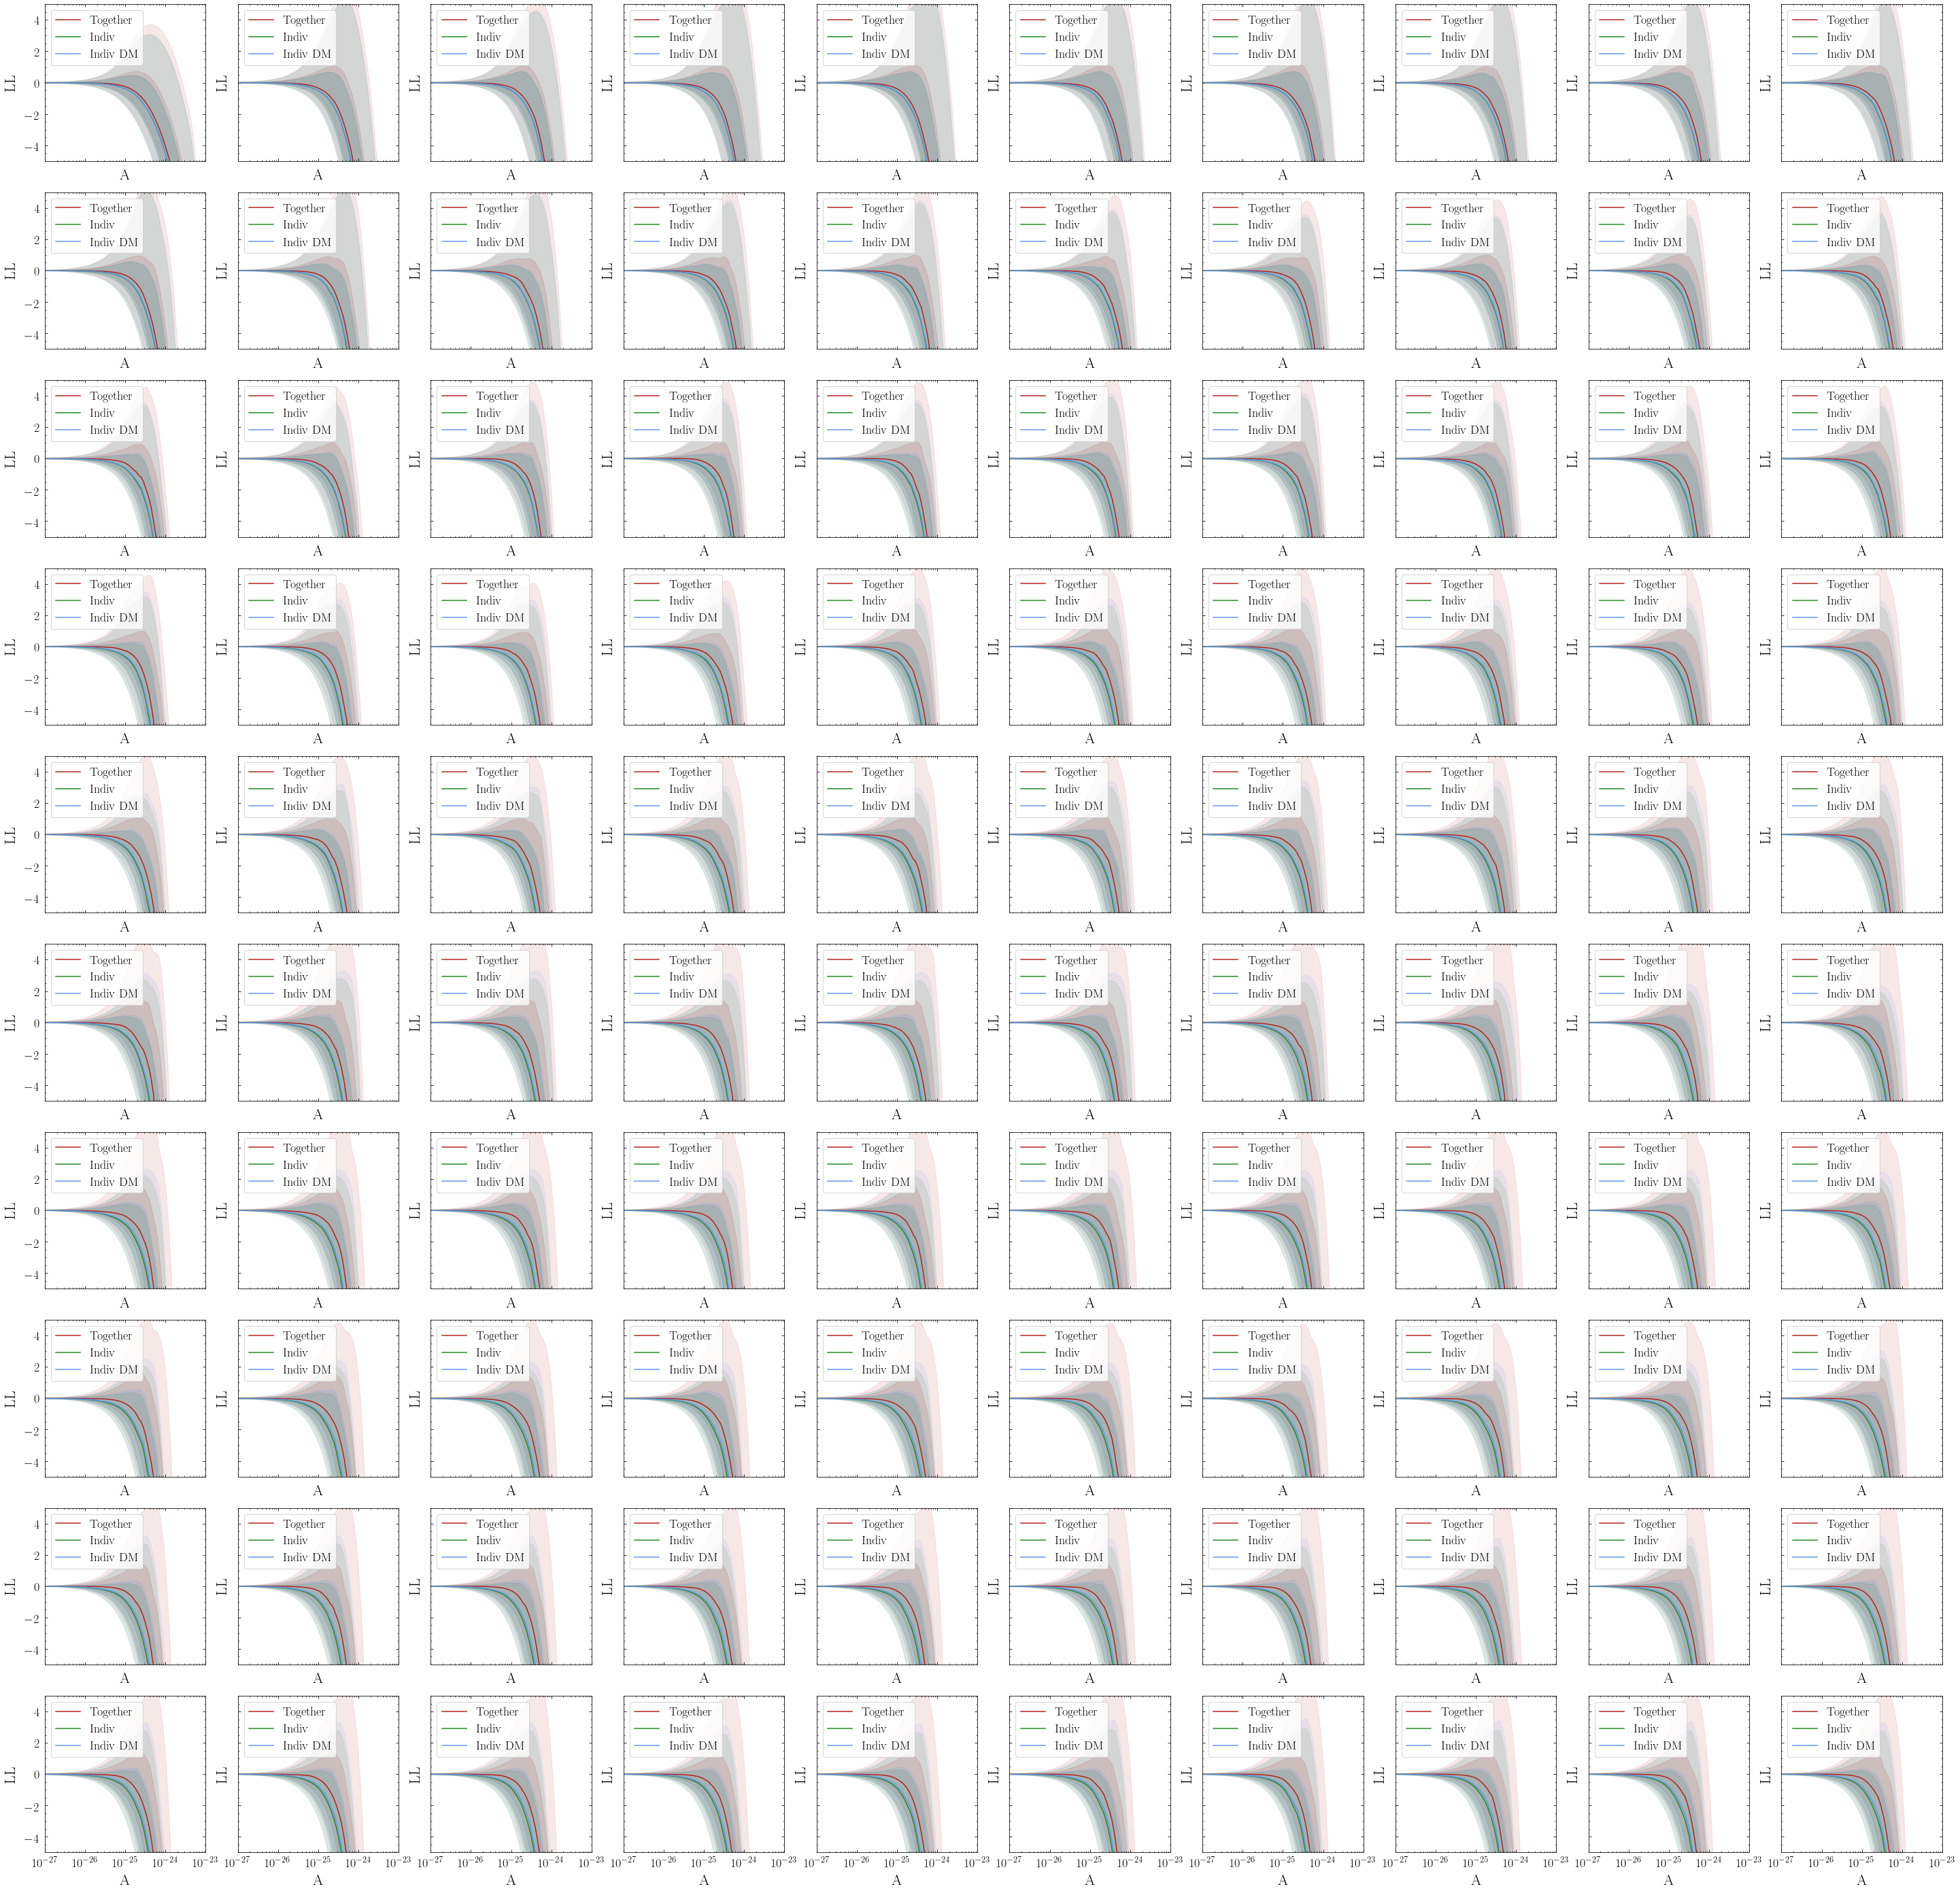

In [43]:
nobj=100
nmc = 80
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = LL2[iobj-1,imc]  + np.load("data/FloatPS_together_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
        LL2[iobj,imc] -= LL2[iobj,imc,0]
        LL2_indiv[iobj,imc] = LL2_indiv[iobj-1,imc]  + np.load("data/FloatPS_indiv_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
        LL2_indiv[iobj,imc] -= LL2_indiv[iobj,imc,0]
        LL2_DM[iobj,imc] = LL2_DM[iobj-1,imc]  + np.load("data/FloatPS_indiv_floatDM//LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
        LL2_DM[iobj,imc] -= LL2_DM[iobj,imc,0]


ncols=10
nrows=10

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(50/1.,50/1.))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='Together')

        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],2.5,axis=0),np.percentile(LL2_indiv[iobj],97.5,axis=0),color='forestgreen',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],16,axis=0),np.percentile(LL2_indiv[iobj],84,axis=0),color='forestgreen',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2_indiv[iobj],50,axis=0),color='forestgreen',label='Indiv')

        cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],2.5,axis=0),np.percentile(LL2_DM[iobj],97.5,axis=0),color='cornflowerblue',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],16,axis=0),np.percentile(LL2_DM[iobj],84,axis=0),color='cornflowerblue',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2_DM[iobj],50,axis=0),color='cornflowerblue',label='Indiv DM')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-27,1e-23)
        cell.set_ylim(-5,5)
fig.savefig("Compare.pdf")